In [1]:

import sys
import os
sys.path.append('../')
print(os.getcwd())
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from agilkia import TraceSet
from sklearn.feature_extraction.text import CountVectorizer
from itertools import groupby
from spmf import Spmf
import numpy as np
import json
from os.path import exists
from pprint import pprint
from utils_experiments import load_config_dict
from stvr.utils_preprocessing import *
from collections import defaultdict

/home/ftamagnan-unix/codevault/stvr_v3


/home/ftamagnan-unix/codevault/stvr_v3


In [2]:
from stvr.pcdc_v2 import PatternCoverageDrivenClustering
from stvr.utils_preprocessing import load_traceset
from stvr.cp_kmeans_with_sampling import Sampling
from stvr.cp_agglutinate import AgglutinatePipeline
from stvr.cp_kmedoids_pipeline import KMedoidsPipeline
from stvr.cp_pattern_encoding_kmeans import KmeansPipelinePatternOneHot
from stvr.cp_kmeans_with_w2v import KmeansW2v
from stvr.cp_no_clustering_only_sampling import NoClustering,OnlySampling
from stvr.cp_kmeans_with_sampling import Sampling
from stvr.cp_vae_encoding_kmeans import VAEEncodingKmeans
from stvr.cp_kmedoids_pipeline import  KMedoidsPipeline
from stvr.cp_kmeans_with_centroids_choice import CentroidsChoice,KmeansPipeline
from pprint import pprint
from stvr.cp_aiay_encoding_kmeans_v2 import AIAY
from stvr.cp_aiay_encoding_plus_v2 import AIAYPlus
from stvr.cp_kmeans_with_w2v_plus import KmeansW2vPlus
from stvr.cp_vae_encoding_plus import VAEEncodingKmeansPlus
# from stvr.cp_kmeans_with_best_usage_choice import BUC
from stvr.cp_kmeans_with_best_usage_choice_v2 import BUC
from stvr.cp_tfidf import TfIdf
from stvr.cp_tfidf_plus import TfIdfPlus
from stvr.cp_bow_plus import BowPlus
# from stvr.cp_pattern_encoding_kmeans import KmeansPipelinePatternOneHot
import sys
import json
import uuid
# from stvr.utils_vae import argss,testargs
from stvr.utils_vae import Hyperparameters

In [3]:
datasets=["femto_booking_agilkia_v6","spree_5000_session_wo_responses_agilkia","teaming_execution","scanette_100043-steps"]

freq_dict={
    "spree_5000_session_wo_responses_agilkia":{"freq":0.5},
    "femto_booking_agilkia_v6":{"freq":0.06},
    "scanette_100043-steps":{"freq":0.2},
    "teaming_execution":{"freq":0.005}
}


# vae_dict={
#     "spree_5000_session_wo_responses_agilkia":{"arch":"VAE"},
#     "femto_booking_agilkia_v6":{"arch":"VAE"},
#     "scanette_100043":{"arch":"VAE"},
#     "teaming_execution":{"arch":"VAE"}
# }

vae_dict={dataset_name:{'arch':'VAE',"freq":freq_dict[dataset_name]['freq']} for dataset_name in datasets}
ae_dict={dataset_name:{"arch":"AE","freq":freq_dict[dataset_name]['freq']} for dataset_name in datasets}
daae_dict={dataset_name:{"arch":"DAAE","freq":freq_dict[dataset_name]['freq']} for dataset_name in datasets}

# print(vae_dict)
pipelines=[]

In [4]:
datapath='./data/datasets/'
# dataset_name="femto_booking_agilkia_v6"/
# dataset_name="femto_booking_with_drain_agilkia_v4"
# dataset_name="spree_5000_session_wo_responses_agilkia"
# dataset_name="teaming_execution"
dataset_name="teaming_execution"
# dataset_name="scanette_100043-steps"

config_dict=load_config_dict('./config/config.json')
config_dict_exp=config_dict['experiments']
freq=config_dict_exp[dataset_name]['freq']
traceset=load_traceset(datapath,dataset_name)
# textset=traceset_to_textset(traceset,format='lst')


In [5]:
pipeline_tuple=("-|Kmedpods|RS",AIAYPlus,Sampling,daae_dict)
filepath=config_dict_exp[dataset_name]['datapath']
print(filepath)

./data/datasets/


In [6]:
clustering_pipeline=pipeline_tuple[1](dataset_name=dataset_name,filepath=filepath,**pipeline_tuple[3][dataset_name])
sample_heuristic=pipeline_tuple[2]()
cluster_nb=9
p=PatternCoverageDrivenClustering(name_exp=None,clustering_pipeline=clustering_pipeline,sample_heuristic=sample_heuristic,execution_traces_agilkia_format=traceset,filepath=filepath,dataset_name=dataset_name,freq=freq,cluster_nb=cluster_nb)
# clustering_pipeline.filepath="."+clustering_pipeline.filepath
X=clustering_pipeline.preprocessor(traceset)
cluster_labels=clustering_pipeline.fit_predict(X,cluster_nb)

here /home/ftamagnan-unix/codevault/stvr_v3
maximum 30


/home/ftamagnan-unix/.local/lib/python3.8/site-packages/torch/nn/functional.py:4999: UserWarning: Support for mismatched src_key_padding_mask and mask is deprecated. Use same type for both instead.
  warnings.warn(


here /home/ftamagnan-unix/codevault/stvr_v3


/home/ftamagnan-unix/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
lst_patterns=p.pc[freq[0]].lst_patterns

In [8]:
listset=traceset_to_textset(traceset,format='lst')
# print(len(lst_patterns))
# patterns={}
# for i in range(max(cluster_labels)+1):
#     patterns[i]={}
#     nb_trace_in_cluster=0
#     for idx_pattern,pattern in enumerate(lst_patterns):
#         for j,trace in enumerate(listset):
#             if cluster_labels[j]==i:
#                 if pattern_in_sentence(pattern[0],trace) and idx_pattern not in patterns[i]:
#                     patterns[i][idx_pattern]=1
#                 if pattern_in_sentence(pattern[0],trace) and idx_pattern in patterns[i]:
#                     patterns[i][idx_pattern]+=1
     
#     for idx_pattern,pattern in enumerate(lst_patterns):
#         if idx_pattern in patterns[i]:
#             # patterns[i][idx_pattern]=patterns[i][idx_pattern]/lst_patterns[idx_pattern][1]
#             count = np.count_nonzero(cluster_labels == i)
#             # print(patterns[i][idx_pattern])
#             tf = patterns[i][idx_pattern]/count
#             idf = len(listset)/lst_patterns[idx_pattern][1]
#             maxtf=max(patterns[i].values())
#             maxtf=maxtf/count
#             ntf=0.5+0.5*(tf/maxtf)
#             patterns[i][idx_pattern]=ntf*idf
#         else:
#             count = np.count_nonzero(cluster_labels == i)
#             tf = 0
#             idf = len(listset)/lst_patterns[idx_pattern][1]
#             maxtf=max(patterns[i].values())/count
#             ntf=0.5+0.5*(tf/maxtf)
#             patterns[i][idx_pattern]=ntf*idf
                        


In [9]:
# print(patterns)

In [10]:
# def get_top_and_bottom_patterns(cluster_dict, n=5):
#     top_bottom_patterns = {}
#     for cluster_id, pattern_dict in cluster_dict.items():
#         # Sort patterns by frequency
#         sorted_patterns = sorted(pattern_dict.items(), key=lambda x: x[1], reverse=True)
#         top_patterns = sorted_patterns[:n]
#         bottom_patterns = sorted_patterns[-n:]
#         top_bottom_patterns[cluster_id] = {'top': dict(top_patterns), 'bottom': dict(bottom_patterns)}
#     return top_bottom_patterns

# top_bottom=get_top_and_bottom_patterns(patterns,n=5)

# for cluster_id, top_bot_dict in top_bottom.items():
#     print('\n top --- :')
#     for k,v in top_bot_dict['top'].items():
#         print(lst_patterns[k][0],v)
#     print('\n bot --- :')
#     for k,v in top_bot_dict['bottom'].items():
#         print(lst_patterns[k][0],v)

In [11]:
# num_clusters = max(cluster_labels)+1
# num_tokens = len(lst_patterns)

# # Initialize an empty NumPy array with zeros
# matrix = np.zeros((num_clusters, num_tokens))

# # Populate the matrix with the weights from the dictionary
# for cluster_id, token_weights in patterns.items():
#     for token_id, weight in token_weights.items():
#         matrix[cluster_id][token_id] = weight

In [12]:
# print(matrix)

In [13]:
# min_value = np.min(matrix)
# max_value = np.max(matrix)

# # Normalize the matrix using min-max scaling
# normalized_matrix = (matrix - min_value) / (max_value - min_value)

In [14]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create a random example matrix of token weights for clusters (replace this with your actual data)
# # In this example, I'm using random values between 0 and 1.
# np.random.seed(0)
# token_weights = normalized_matrix

# # Create a heatmap using Seaborn with a colormap from red to green
# plt.figure(figsize=(10, 8))
# sns.heatmap(token_weights, cmap="RdYlGn", xticklabels=False, yticklabels=False,linewidths=0.5, linecolor='white')

# plt.xlabel("Patterns")
# plt.ylabel("Clusters")
# plt.title("Pattern Importance Heatmap for Clusters (Red to Green)")
# plt.show()

In [15]:
# import numpy as np
# from scipy import stats

# # Sample data
# num_tokens=len(lst_patterns)
# X=np.load('./data/datasets/spmf_one_hot_'+dataset_name+'_'+str(freq[0])+'_v2.npy')
# num_clusters=max(cluster_labels)+1
# Y = cluster_labels  # Replace with your binary target vector (0 or 1)
# matrix = np.zeros((num_clusters, num_tokens))
# n_features=X.shape[1]
# correlation_matrix = np.zeros((num_clusters, n_features))
# for c in range(num_clusters):
#     # X_prime = X[Y == c]

#     # Create binary target vector Y' based on the condition
#     Y_prime = np.where(Y == c, 1, 0)

#     # Calculate point biserial correlation for each feature
#     point_biserial_correlations = []
#     for feature_idx in range(n_features):
#         r, p = stats.pointbiserialr(X[:, feature_idx], Y_prime)
#         correlation_matrix[c, feature_idx] = r

    # Print the results
    # for feature_idx, (r, p) in enumerate(point_biserial_correlations):
    #     print(f"Feature {feature_idx+1}: Point Biserial Correlation = {r:.4f}, p-value = {p:.4f}")

In [16]:
import numpy as np

# Create your binary vectors (replace these with your actual data)
def phi_coefficient(vector_a,vector_b):
# Create a 2x2 contingency table
    contingency_table = np.array([[np.sum((vector_a == 0) & (vector_b == 0)),
                                np.sum((vector_a == 0) & (vector_b == 1))],
                                [np.sum((vector_a == 1) & (vector_b == 0)),
                                np.sum((vector_a == 1) & (vector_b == 1))]])

    # Calculate the Phi coefficient
    a = contingency_table[0, 0]
    b = contingency_table[0, 1]
    c = contingency_table[1, 0]
    d = contingency_table[1, 1]

    phi = (a * d - b * c) / np.sqrt((a + b) * (c + d) * (a + c) * (b + d))

    return phi


In [17]:
import numpy as np
from scipy import stats

# Sample data
num_tokens=len(lst_patterns)
X=np.load('./data/datasets/spmf_one_hot_'+dataset_name+'_'+str(freq[0])+'_v2.npy')
num_clusters=max(cluster_labels)+1
if type(cluster_labels)==list:
    cluster_labels=np.array(cluster_labels)
Y = cluster_labels  # Replace with your binary target vector (0 or 1)
n_features=X.shape[1]
correlation_matrix = np.zeros((num_clusters, n_features))
for c in range(num_clusters):
    # X_prime = X[Y == c]

    # Create binary target vector Y' based on the condition
    Y_prime = np.where(Y == c, 1, 0)

    for feature_idx in range(n_features):
        phi=phi_coefficient(X[:, feature_idx], Y_prime)
        correlation_matrix[c, feature_idx] = phi

/tmp/ipykernel_458/395447875.py:17: RuntimeWarning: invalid value encountered in scalar divide
  phi = (a * d - b * c) / np.sqrt((a + b) * (c + d) * (a + c) * (b + d))


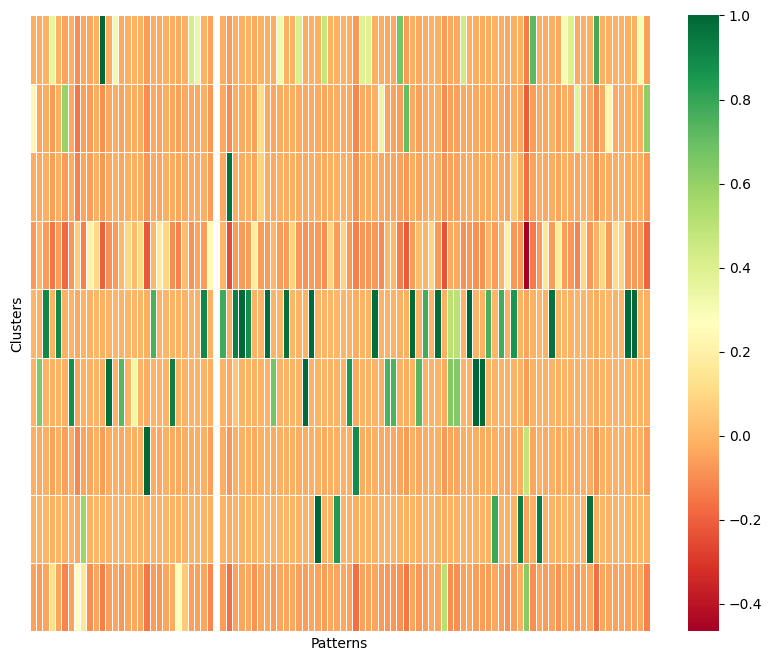

In [18]:


# Create a random example matrix of token weights for clusters (replace this with your actual data)
# In this example, I'm using random values between 0 and 1.
np.random.seed(0)
token_weights = correlation_matrix

# Create a heatmap using Seaborn with a colormap from red to green
plt.figure(figsize=(10, 8))
sns.heatmap(token_weights, cmap="RdYlGn", xticklabels=False, yticklabels=False,linewidths=0.5, linecolor='white')

plt.xlabel("Patterns")
plt.ylabel("Clusters")
# plt.title("Pattern Importance Heatmap for Clusters (Red to Green)")
plt.show()

In [19]:
weights=correlation_matrix
# Find the top 5 positive and negative values for each cluster
top_positive_values = []
top_negative_values = []
top_n=6
val=[]
for row in weights:
    # Sort indices based on the absolute value of weights
    sorted_indices = np.argsort(np.abs(row))[-top_n:]
    
    # Get the top N indices for positive and negative values
    top_positive = sorted([index for index in sorted_indices if row[index] >= 0])
    top_negative = sorted([index for index in sorted_indices if row[index] < 0])
    
    # Append to the respective lists
   

# Print the results
    print("Top Positive Values:")
    val.append([top_positive,top_negative])


Top Positive Values:
Top Positive Values:
Top Positive Values:
Top Positive Values:
Top Positive Values:
Top Positive Values:
Top Positive Values:
Top Positive Values:
Top Positive Values:


In [20]:
for i,row in enumerate(val):
    a='\hline\n'+str(i)+'&'
    for blue in row[1]:
        a+=r'\textcolor{blue}P'+str(blue)+','
        
print(a)

\hline
8&\textcolor{blue}P89,


In [21]:
data=val
latex_code = "\\begin{tabular}{|c|c|c|}\n"
latex_code += "\\hline\n"
latex_code += "Cluster ID & Positive Discriminative Pattern & Negative Discriminative Pattern \\\\\n"
latex_code += "\\hline\n"

for cluster_id, (positive, negative) in enumerate(data, start=1):
    # Check if positive and negative lists are empty and replace with '-'
    if not positive:
        positive_text = '-'
    else:
        positive_text = ', '.join(map(str, positive))
    
    if not negative:
        negative_text = '-'
    else:
        negative_text = ', '.join(map(str, negative))
    
    latex_code += f"{cluster_id} & {positive_text} & {negative_text} \\\\\n"

# LaTeX table footer
latex_code += "\\hline\n"
latex_code += "\\end{tabular}"

# Print the LaTeX code
print(latex_code)

\begin{tabular}{|c|c|c|}
\hline
Cluster ID & Positive Discriminative Pattern & Negative Discriminative Pattern \\
\hline
1 & 11, 46, 58, 79, 89 & - \\
2 & 5, 55, 59, 86, 97 & - \\
3 & 31 & 7, 51, 78, 89 \\
4 & 28 & 18, 31, 65, 78 \\
5 & 33, 44, 69, 94, 95 & - \\
6 & 12, 22, 43, 70, 71 & - \\
7 & 18, 51, 78 & 7, 89 \\
8 & 45, 48, 77, 80, 88 & - \\
9 & 7, 23, 65, 78 & 89 \\
\hline
\end{tabular}


In [22]:
data=val
latex_code = "\\begin{tabular}{|c|c|c|}\n"
latex_code += "\\hline\n"
latex_code += "Cluster ID & Positive Discriminative Pattern & Negative Discriminative Pattern \\\\\n"
latex_code += "\\hline\n"

# Function to format a list of IDs with color
def format_pattern_list(pattern_list, color):
    if not pattern_list:
        return '-'
    else:
        return f"\\textcolor{{{color}}}{{{' , '.join(map(str, pattern_list))}}}"

# Iterate through the data and format into LaTeX table rows
for cluster_id, (positive, negative) in enumerate(data, start=1):
    positive_text = format_pattern_list(positive, 'teal')
    negative_text = format_pattern_list(negative, 'red')
    latex_code += f"{cluster_id} & {positive_text} & {negative_text} \\\\\n"

# LaTeX table footer
latex_code += "\\hline\n"
latex_code += "\\end{tabular}"

# Print the LaTeX code
print(latex_code)








\begin{tabular}{|c|c|c|}
\hline
Cluster ID & Positive Discriminative Pattern & Negative Discriminative Pattern \\
\hline
1 & \textcolor{teal}{11 , 46 , 58 , 79 , 89} & - \\
2 & \textcolor{teal}{5 , 55 , 59 , 86 , 97} & - \\
3 & \textcolor{teal}{31} & \textcolor{red}{7 , 51 , 78 , 89} \\
4 & \textcolor{teal}{28} & \textcolor{red}{18 , 31 , 65 , 78} \\
5 & \textcolor{teal}{33 , 44 , 69 , 94 , 95} & - \\
6 & \textcolor{teal}{12 , 22 , 43 , 70 , 71} & - \\
7 & \textcolor{teal}{18 , 51 , 78} & \textcolor{red}{7 , 89} \\
8 & \textcolor{teal}{45 , 48 , 77 , 80 , 88} & - \\
9 & \textcolor{teal}{7 , 23 , 65 , 78} & \textcolor{red}{89} \\
\hline
\end{tabular}


In [23]:
print(data)

[[[11, 46, 58, 79, 89], []], [[5, 55, 59, 86, 97], []], [[31], [7, 51, 78, 89]], [[28], [18, 31, 65, 78]], [[33, 44, 69, 94, 95], []], [[12, 22, 43, 70, 71], []], [[18, 51, 78], [7, 89]], [[45, 48, 77, 80, 88], []], [[7, 23, 65, 78], [89]]]


In [24]:
for i,(positive,negative) in enumerate(data):
    print('\n','cluster',i)
    print('pos')
    for id_ in positive:
        print(lst_patterns[id_])
    print('neg')
    for id_ in negative:
        print(lst_patterns[id_])    


 cluster 0
pos
[['<sos>', 'PUT|/api//customers//sites//callcenters//announcement|None', '<eos>'], 525]
[['<sos>', 'PUT|/api//customers//sites//services//CallForwardingSelective|None', '<eos>'], 124]
[['<sos>', 'PUT|/api//customers//sites//callcenters//announcement|None', 'PUT|/api//customers//sites//callcenters//incomingCall|None', '<eos>'], 243]
[['<sos>', 'PUT|/api//customers//sites//callcenters//incomingCall|None', 'PUT|/api//customers//sites//callcenters//announcement|None', '<eos>'], 281]
[['<sos>', 'PUT|/api//customers//sites//callcenters//incomingCall|None', '<eos>'], 845]
neg

 cluster 1
pos
[['<sos>', 'PUT|/api//customers//sites//users//softkeys/|None', '<eos>'], 437]
[['<sos>', 'PUT|/api//customers//sites//users//blfList|None', 'POST|/api//customers//sites//users//softkeys|None', '<eos>'], 148]
[['<sos>', 'POST|/api//customers//sites//users//softkeys|None', '<eos>'], 618]
[['<sos>', 'POST|/api//customers//sites//users//softkeys|None', 'PUT|/api//customers//sites//users//blfL